In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
from src import RGBDataset, RGBDataModule

In [38]:
dm = RGBDataModule()
dm.setup()

train: 1587395
val: 40080
test: 36421


In [40]:
imgs, labels = next(iter(dm.train_dataloader(batch_size=25)))
imgs.shape, imgs.dtype, imgs.max(), imgs.min(), labels

(torch.Size([25, 256, 256, 3]),
 torch.uint8,
 tensor(255, dtype=torch.uint8),
 tensor(0, dtype=torch.uint8),
 tensor([  437,  3953,  6229, 10641,    56,  5095,  6398,   294,  1597,   941,
          5423,  2719,  6309,   739,  8405,  5609,  5488,   754,  6696,  8000,
           416,   471,   666,  6172,  5623]))

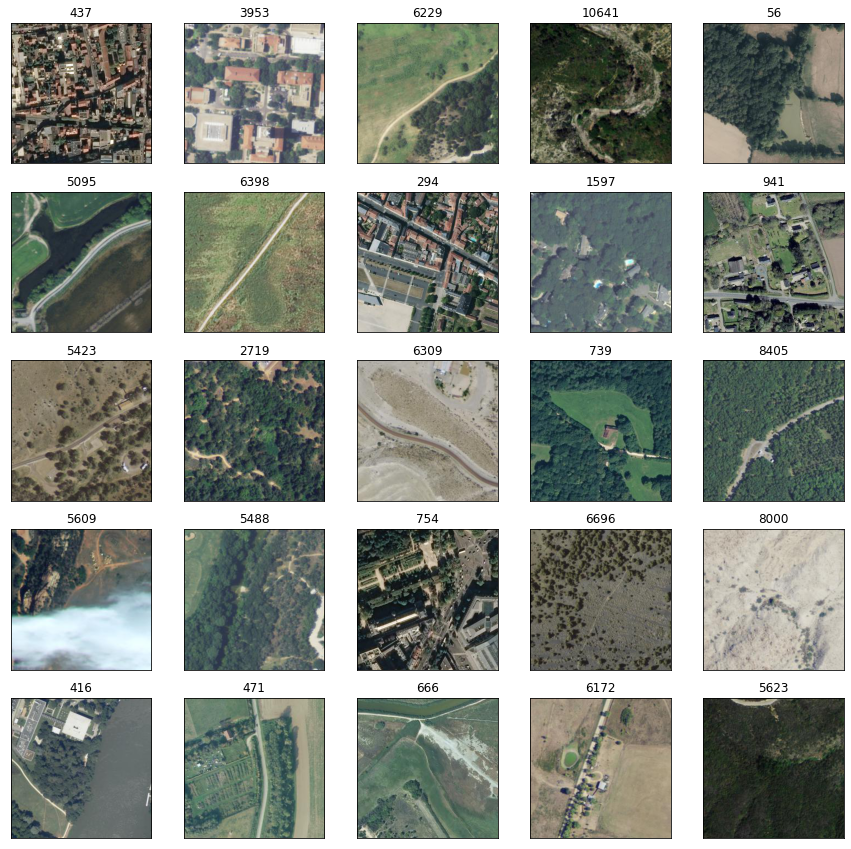

In [42]:
import matplotlib.pyplot as plt

# plot images in a 5x5 grid
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
for i, ax in enumerate(axs.flat):
    ax.imshow(imgs[i])
    ax.set(xticks=[], yticks=[])
    ax.set_title(labels[i].item())
plt.show()

In [47]:
from src import RGBModule

hparams = {
    'backbone': 'resnet18',
    'pretrained': True,
    'optimzier': 'Adam',
    'optimizer_params': {
        'lr': 1e-3
    }
}

module = RGBModule(hparams)
outputs = module(imgs)
outputs.shape

torch.Size([25, 17037])

In [55]:
import pytorch_lightning as pl

hparams = {
    'datamodule': {
        'batch_size': 256,
        'num_workers': 20,
        'pin_memory': True
    },
    'backbone': 'resnet18',
    'pretrained': True,
    'optimizer': 'Adam',
    'optimizer_params': {
        'lr': 1e-3
    }
}


dm = RGBDataModule(**hparams['datamodule'])
module = RGBModule(hparams)

trainer = pl.Trainer(
    gpus=1,
    max_epochs=10,
    enable_checkpointing=False,
    logger=None,
    # overfit_batches=1
)

trainer.fit(module, dm)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 19.9 M
---------------------------------
19.9 M    Trainable params
0         Non-trainable params
19.9 M    Total params
79.666    Total estimated model params size (MB)


train: 1587395
val: 40080
test: 36421


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]